In [1]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import coordinates as coord
import astropy.units as u
import ligo.skymap.plot
import gbmgeometry as gbmg
%matplotlib inline
import h5py
import os
import numpy as np
import pandas as pd
envpath = os.environ.get('SIMULATOR')
simname = "OneTwoHFixed"
gpname = "gp0"
simpath=envpath+"/"+simname+"_Files/"
file=h5py.File(simpath+simname+".hdf5","r")
fisher=file["/grid/"+gpname+"/fisher"]
gptruepos=file["/grid/"+gpname].attrs["True Position"]
gptruepossc = SkyCoord(gptruepos[0]*u.degree,gptruepos[1]*u.degree)

In [20]:
np.array(file["grid/gp0/Spectrum Parameters"])

array([[(1.12104445e-05, 300., -1.)]],
      dtype=[('F', '<f8'), ('xp', '<f8'), ('alpha', '<f8')])

In [49]:
flist=[]
flist_select=[]
fname=[]
for f in fisher:
    if f in df.query("36<=distance<=39").to_numpy():
        flist_select.append(fisher[f].attrs['Position'])
    else:
        flist.append(fisher[f].attrs['Position'])
    fname.append(f)
flist=np.transpose(flist)
flist_select = np.transpose(flist_select)

In [47]:
flist_select

array([[263.83014109, 263.41590132, 262.83737011, 262.46059184,
        264.40467328, 264.12326829, 266.66625123, 264.15178783,
        263.65923226, 262.25774556, 266.8008472 , 264.37277932,
        261.25381507, 262.85305443, 262.80317574, 264.92624706,
        265.81615224],
       [ 28.39844236,  28.77536235,  23.49879311,  31.33866057,
         30.99981377,  18.46344643,  13.67193403,  26.92932108,
         31.38814009,  33.8320788 ,  14.64331172,  24.60270585,
         29.68161851,  19.96051465,  32.97696657,  15.97437511,
         22.79477001]])

In [40]:
fig =plt.figure(figsize=(10,10),dpi=400)

<Figure size 4000x4000 with 0 Axes>

In [3]:
pos = gbmg.PositionInterpolator(trigdat="/home/niklasvm/Envs/Plot/rawdata/glg_trigdat_all_bn131229277_v02.fit")
time=0
sc=pos.sc_pos(time)
sq=pos.quaternion(time)


In [4]:
H=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistH.npy")
xe=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistxe.npy")
ye=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistye.npy")

In [5]:
fermi=gbmg.GBM(sq,sc_pos=sc)

In [6]:
n5=fermi.n5.get_fov(10)
n4=fermi.n4.get_fov(10)
n3=fermi.n3.get_fov(10)

In [10]:
center=fermi.n2.center

In [126]:
lon=277
lat=26

In [129]:
print(np.cos(lon)*np.cos(lat))
print(np.sin(lon)*np.cos(lat))
np.sin(lat)

0.5549193724456322
0.33251932227570336


0.7625584504796027

In [125]:
SkyCoord(ra=267*u.degree,dec=46*u.degree,frame='icrs').transform_to("AltAz")

ValueError: Transform `frame` must be a frame name, class, or instance

In [26]:
gptruepossc

<SkyCoord (ICRS): (ra, dec) in deg
    (274.30164591, 26.30790612)>

In [98]:
file["grid/gp0/(0,0)"].attrs["SelectedDetectors"]

array([b'n2', b'n4', b'n5', b'b0'], dtype='|S2')

Contour KDE Balrog

In [13]:
im=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistH.npy")
xmin=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistxmin.npy")
xmax=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistxmax.npy")
ymin=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistymin.npy")
ymax=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistymax.npy")

/home/niklasvm/Envs/Plot/lib/python3.6/site-packages/astropy/visualization/wcsaxes/core.py:260: UserWarning: The following kwargs were not used by contour: 'shade'
  cset = super().contourf(*args, **kwargs)


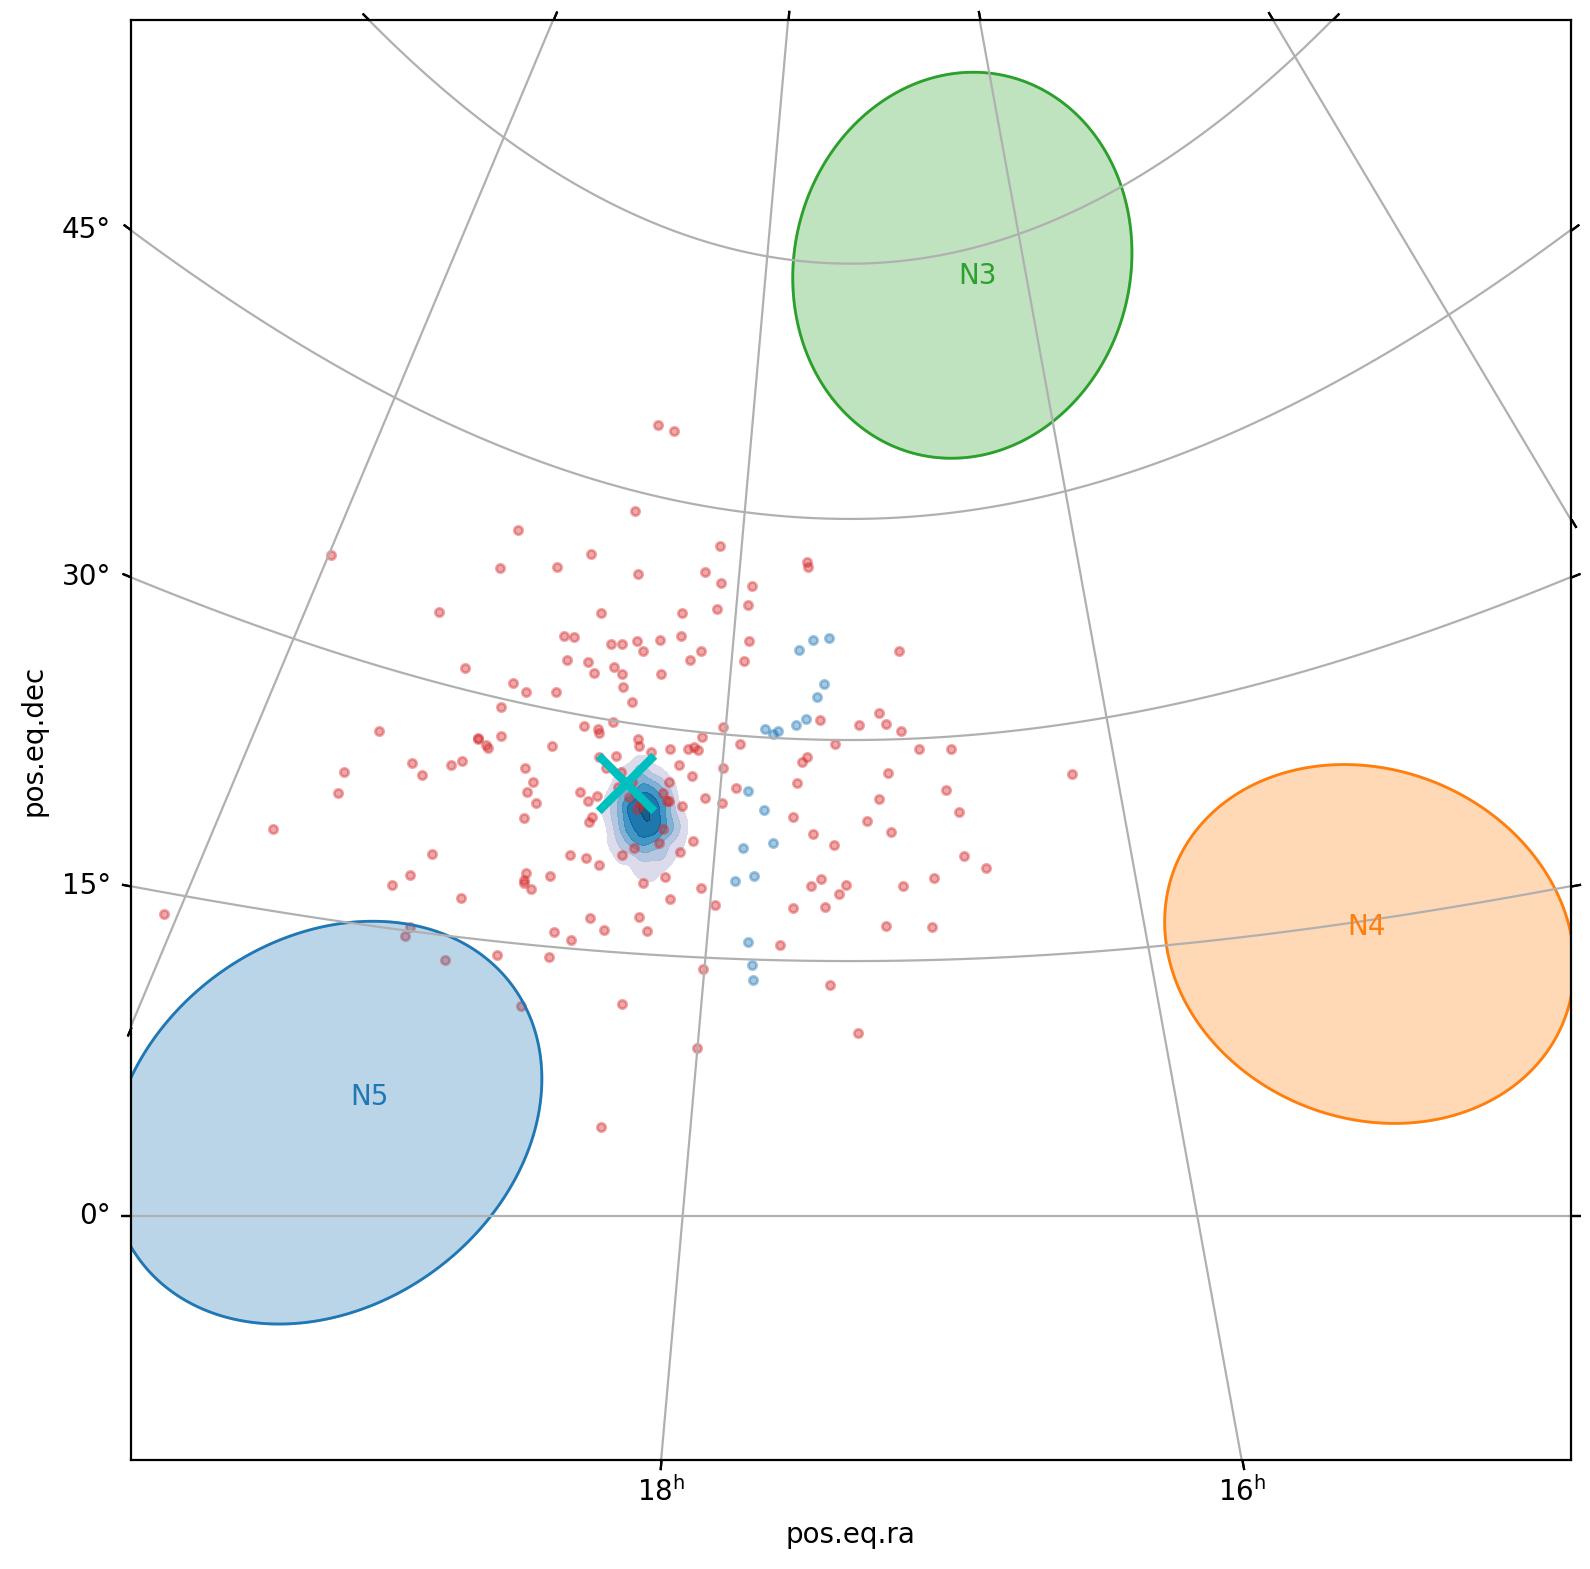

In [50]:
fig =plt.figure(figsize=(8,8),dpi=200)
plt.gcf().subplots_adjust(bottom=.25)
ax=plt.axes([0.05,0.05,0.9,0.9],projection="astro zoom",center=SkyCoord(ra=260*u.degree,dec=30*u.degree,frame='icrs'),radius=50*u.degree)
ax.grid()
ax.plot(277,26,marker=ligo.skymap.plot.reticle(inner=0,angle=45),markersize=20,markeredgewidth=3,color='c',transform=ax.get_transform('world'))
ax.fill(n5[0],n5[1],transform=ax.get_transform('world'),alpha=0.3,color='#1f77b4')
ax.fill(n5[0],n5[1],transform=ax.get_transform('world'),fill=False,color='#1f77b4')
ax.fill(n3[0],n3[1],transform=ax.get_transform('world'),alpha=0.3,color='#2ca02c')
ax.fill(n3[0],n3[1],transform=ax.get_transform('world'),fill=False,color='#2ca02c')
ax.fill(n4[0],n4[1],transform=ax.get_transform('world'),alpha=0.3,color='#ff7f0e')
ax.fill(n4[0],n4[1],transform=ax.get_transform('world'),fill=False,color='#ff7f0e')
#ax.contour(H,extent=[xe[0],xe[-1],ye[0],ye[-1]],transform=ax.get_transform('world'))
con=plt.contourf(im,extent=[xmin,xmax,ymin,ymax],cmap="PuBu",shade=True,transform=ax.get_transform('world'))
con.set_alpha(0.9)
con.collections[0].set_alpha(0)
ax.scatter(flist[0],flist[1],transform=ax.get_transform('world'),alpha=0.4,color='#d62728',marker='.')
ax.scatter(flist_select[0],flist_select[1],transform=ax.get_transform('world'),alpha=0.4,color='#1f77b4',marker='.')
ax.annotate("N4",(fermi.n4.center.icrs.ra.degree,fermi.n4.center.icrs.dec.degree),xycoords=ax.get_transform('world'),color='#ff7f0e')
ax.annotate("N5",(fermi.n5.center.icrs.ra.degree,fermi.n5.center.icrs.dec.degree),xycoords=ax.get_transform('world'),color='#1f77b4')
ax.annotate("N3",(fermi.n3.center.icrs.ra.degree,fermi.n3.center.icrs.dec.degree),xycoords=ax.get_transform('world'),color='#2ca02c')
#for i,f in enumerate(fisher):
#    if f in dist10['name'].to_numpy():
#        ax.annotate(str(f),(flist[0][i],flist[1][i]),xycoords=ax.get_transform('world'))

plt.savefig("n3n4n5_triang_overview.jpeg",bbox_inches="tight")
plt.show()

In [16]:
center=SkyCoord(ra=260*u.degree,dec=7*u.degree,frame='icrs')

In [58]:
center.icrs.ra.deg

342.645420194876

In [76]:
sccord=SkyCoord(ra=testn2[0]*u.degree,dec=testn2[1]*u.degree,frame='icrs')

In [45]:
ls={}
ls["name"]=[]
ls["distance"]=[]
for i,f in enumerate(fisher):
    pos=fisher[f].attrs["Position"]
    possc=SkyCoord(pos[0]*u.degree,pos[1]*u.degree)
    dl=fermi.detectors['n4'].get_center().separation(possc)
    ls["name"].append(f)
    ls["distance"].append(dl.degree)
df=pd.DataFrame.from_dict(ls)   

In [66]:
dist10['name'].to_numpy()

array(['f104', 'f127', 'f135', 'f140', 'f150', 'f164', 'f188', 'f195',
       'f197', 'f30', 'f34', 'f35', 'f4', 'f67', 'f71'], dtype=object)

In [87]:
H

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [92]:
np.max(H)

40.0